###### KERAS INTRODUCTION ######

In [ ]:
#####

##### Anomaly Detection ####

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [5]:
# Importing Numpy for numerical arrays

import numpy as np

# Importing Pandas for creating dataframes

import pandas as pd

# Importing Keras from tensorflow library - Neural Networks

from tensorflow import keras

# Importing layers of Neural Networks

from tensorflow.keras import layers

# Importing pyplot for plotting figures

from matplotlib import pyplot as plt


#### Load the Data

https://www.kaggle.com/datasets/boltzmannbrain/nab

The Keras model is using data from the Numenta Anomaly Benchmark (NAB) dataset. The (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source.

The below model uses two of these datasets - art_daily_small_noise.csv & art_daily_jumpsup.csv.

In [6]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

# Data without anomaly

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

# Data with anomaly

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)


In [ ]:
# URL paths for data - to be used for descriptive stats

url_no_anomaly = "https://github.com/numenta/NAB/blob/master/data/artificialNoAnomaly/art_daily_small_noise.csv"
    
url_with_anomaly = "https://github.com/numenta/NAB/blob/master/data/artificialWithAnomaly/art_daily_jumpsup.csv"

# Read in csv files from respective paths

df_small_noise = pd.read_csv(url_no_anomaly, parse_dates=True, index_col="timestamp") 

df_daily_jumpsup = pd.read_csv(url_with_anomaly, parse_dates=True, index_col="timestamp")

#### No Anomaly #### 

In [8]:
# Print data without anomaly. Defaults to first 5 rows but this can be changed by inserting a number.

print(df_small_noise.head()) 


                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120


In [11]:
# Getting descriptive stats - No anomaly

df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


The 'describe' function gives a overview of the data in the file.

Count - # of rows of data.

Mean - The average value.

STD - Standard deviation of the values.

Min - Minimum value observed.

Percentiles - 25, 50 & 75. 50 is the same as the median. From the above, we can see that 25% of values are 19.841 or lower. 75 % of values are 75.450 or lower.

Max - The maximum observed value.



In [ ]:
# Plotting Data - No anomaly

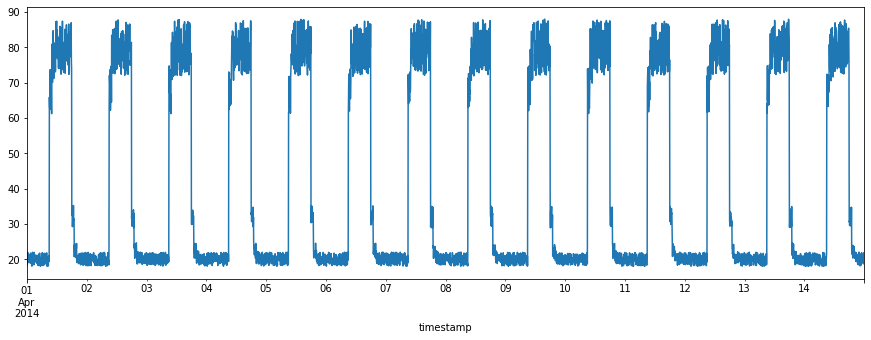

In [15]:
fig, ax = plt.subplots(figsize = (15,5))
df_small_noise.plot(legend=False, ax=ax)
plt.show()


#### With Anomaly ####

In [12]:
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


In [13]:
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


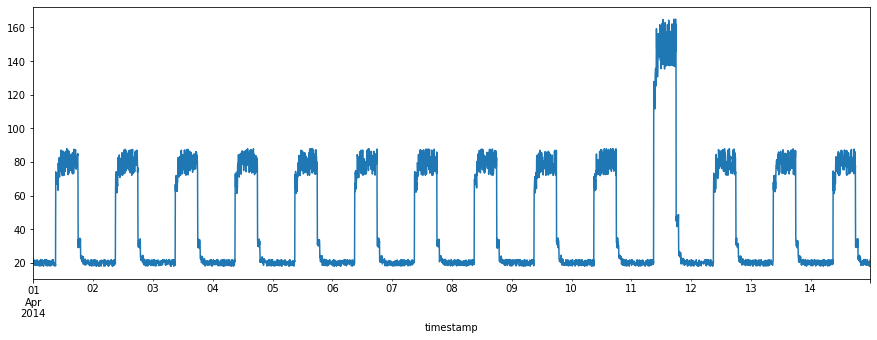

In [16]:
fig, ax = plt.subplots(figsize = (15,5))
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()


Using the same functions as we did on the dataset without an anomaly, we can see the difference most clearly in the graph above.  The values between the 11th & 12th are clearly out of sync with the other dates.